In [416]:
%matplotlib inline
from operator import itemgetter
from urllib2 import urlopen

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from datetime import datetime, date, time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pprint
from collections import Counter
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(10, 6)

Populating the interactive namespace from numpy and matplotlib


In [417]:
# Let's never write this again. It's what Pandas was made for
# Just keeping it till I write the heatmap to use the Dataframe from the cvs's below
def get_events(directory="./"):
    ''' Parse the events files and return a list of events'''
    events = []
    for filename in os.listdir(directory):
        
        if not filename.startswith("event_"):
            continue
        if filename.startswith("event_log20170318.txt"):
            continue
        year = int(filename[9:13])
        month = int(filename[13:15])
        day = int(filename[15:17])
        d = date(year,month,day)
        with file(filename) as f:
            s = f.read()
        fevents = [ x.split(",") for x in s.splitlines()]
        for fevent in fevents:
            try:
                h = int(fevent[0].split(':')[0])
                m = int(fevent[0].split(':')[1])
                s = int(fevent[0].split(':')[2])
            except IndexError:
                print "Got an odd event in " + filename + " : " + str(fevent)
            t = time(h,m,s)
            fevent[0] = datetime.combine(d, t)
            fevent[5] = float(fevent[5])
            events.append(fevent)
    return events

In [420]:
def plot_heatmap(events):
    ''' Plot a histogram by hour of the meteor counts'''
    heatdata = {}
    days = set([x[0].date() for x in events])
    for day in days:
        heatdata[day]=[]
        count =  Counter([ x[0].hour for x in events if x[0].date() == day])
        daydata = []
        for hour in range(0,24):
            daydata.append(count[hour])
        heatdata[day]=daydata
    df = pd.DataFrame(data=heatdata).T

    fig, ax = plt.subplots()

    heatmap = ax.pcolor(df)
    cbar = fig.colorbar(heatmap)
    
    fig = plt.gcf()
    
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(df.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(df.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(range(0,24), minor=False)
    ax.set_yticklabels(df.index, minor=False)

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    ax.set_title('Heatmap of Meteor counts by hour over time.')
    ax.set_xlabel('Hour of Day.')
    ax.set_ylabel('Date.')
    cbar.ax.set_title('# Meteors.')



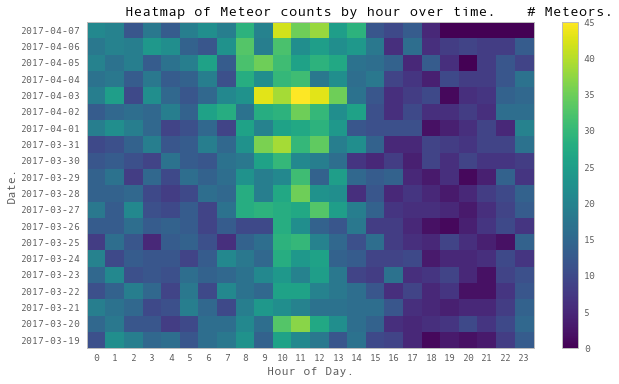

In [421]:
events = get_events()
plot_heatmap(events)

In [422]:
# Get the longest meteors
#sorted(events, key=itemgetter(5))[-10:]

In [423]:
filename = "event_log20170319.txt"
year = int(filename[9:13])
month = int(filename[13:15])
day = int(filename[15:17])
d = date(year,month,day)

def dateparse(x):
    return datetime.combine(d, datetime.strptime(x, '%H:%M:%S').time())

df = pd.read_csv(filename, 
                 parse_dates=['Time'], 
                 dayfirst=True, 
                 names = ["Time", "Hour Event", "Doppler", "x", "y", "Duration"],
                 date_parser=dateparse,
                index_col="Time")

df[:3]

,Hour Event,Doppler,x,y,Duration
Time,,,,,
2017-03-19 00:07:21,1,-80.2,-104.6,2296,0.51
2017-03-19 00:12:23,2,-85.7,-106.5,2292,0.17
2017-03-19 00:16:20,3,-90.0,-107.0,2290,0.17


In [424]:

def dateparse(x):
    return datetime.combine(d, datetime.strptime(x, '%H:%M:%S').time())

files = !ls event*
dflist=[]
for filename in files:
    d = datetime.strptime(filename[9:17], '%Y%m%d')
    dflist.append(pd.read_csv(filename, 
                 parse_dates=['Time'], 
                 names = ["Time", "Hour Event", "Doppler", "x", "y", "Duration"],
                 date_parser=dateparse,
                index_col="Time"))
df=pd.concat(dflist)
daterangestr=str(df.index.date.min())+' to ' + str(df.index.date.max()) +'.'

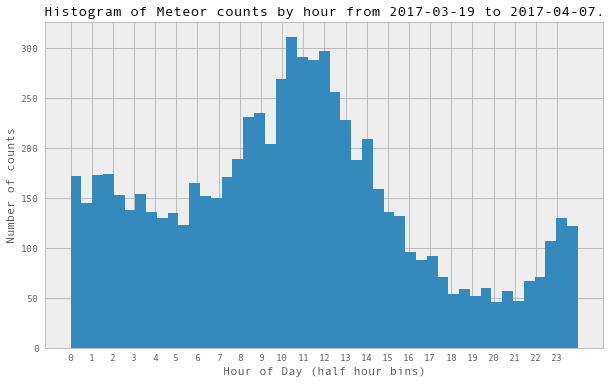

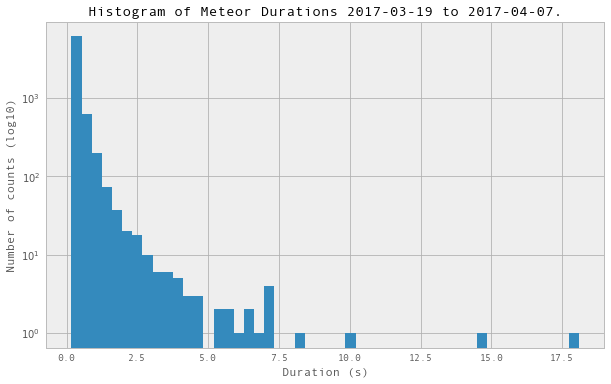

In [425]:
fig, ax = plt.subplots()
ax.set_title('Histogram of Meteor counts by hour.')
ax.set_xlabel('Hour of Day (half hour bins)')
ax.set_ylabel('Number of counts')
ax.set_xticks(range(0,24), minor=False)
ax.set_xticklabels(range(0,24), minor=False)
df['Hour'] = df.index.hour + df.index.minute/60.0
df.hist("Hour", bins=47, ax=ax)
plt.title('Histogram of Meteor counts by hour from ' + daterangestr)

fig, ax = plt.subplots()
ax.set_title('Histogram of Meteor Durations.')
ax.set_xlabel('Duration (s)')
ax.set_ylabel('Number of counts (log10)')
ax.set_yscale('log')
df.hist("Duration", ax=ax, bins=50)
plt.title('Histogram of Meteor Durations ' + daterangestr)


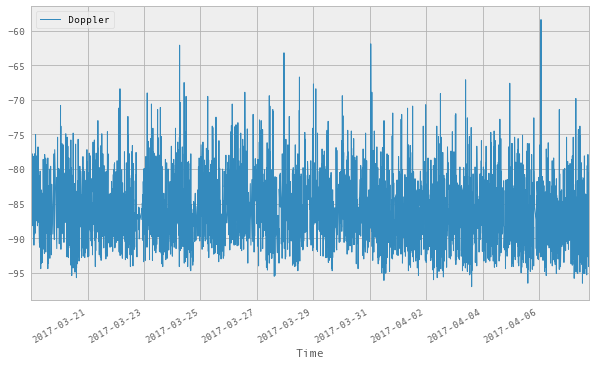

In [426]:
df.plot(y='Doppler')


In [404]:
df['Doppler'].mean()

-86.49902994517058